In [61]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special

In [62]:
def busquedaBinaria(A, b):
    if(len(A) == 1):
        if(A[0] == b):
            return b
        else:
            raise Exception('El elemento no existe')
    else:
        r1 = A[:len(A)//2]
        r2 = A[len(A)//2:]
        if(r1[len(r1) - 1] == b):
            return b
        elif(r1[len(r1) - 1] > b):
            return busquedaBinaria(r1, b)
        else:
            return busquedaBinaria(r2, b)

In [63]:
def busquedaTernaria(A, b):
    if(len(A) == 2):
        return busquedaBinaria(A, b)
    elif(len(A) == 1):
        if(A[0] == b):
            return b
        else:
            raise Exception('El elemento no existe')
    else:
        r1 = A[:len(A)//3]
        r2 = A[len(r1): len(r1) * 2]
        r3 = A[len(r1) + len(r2):]
        if(r1[len(r1) - 1] == b):
            return b
        elif(r1[len(r1) - 1] > b):
            return busquedaTernaria(r1, b)
        elif(r2[len(r2) - 1] > b):
            return busquedaTernaria(r2, b)
        else:
            return busquedaTernaria(r3, b)

In [64]:
n_min = 10
n_max = 10000
st = 10
iteraciones = 10 # iteraciones del benchmark

bus_bin_DC = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = list(range(1, 10000))
        suma += timeit.timeit(lambda: busquedaBinaria(v, 9999), number = 1)
    promedio = suma / iteraciones
    bus_bin_DC.append(promedio)

bus_ter_DC = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = list(range(1, 10000))
        suma += timeit.timeit(lambda: busquedaTernaria(v, 9999), number = 1)
    promedio = suma / iteraciones
    bus_ter_DC.append(promedio)    


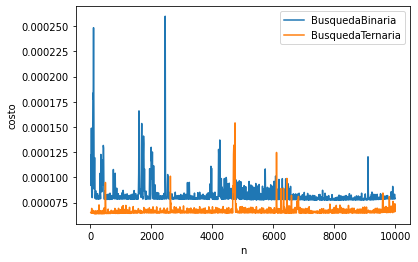

In [65]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, bus_bin_DC, label = 'BusquedaBinaria')
plt.xlabel('n')
plt.ylabel('costo')
plt.legend()

eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, bus_ter_DC, label = 'BusquedaTernaria')
plt.xlabel('n')
plt.ylabel('costo')
plt.legend()